In [1]:
import fitsio
# system
import os
import subprocess
import sys
import tempfile
import shutil
import re
import sys

In [2]:
import numpy as np
from astropy.table import Table,join

In [3]:
os.chdir('../py/LSS/SV3')

In [4]:
os.getcwd()

'/global/u2/a/ajross/LSS/py/LSS/SV3'

In [4]:
sys.path.append('../py/')

In [40]:
import fatools as fa

In [57]:
#only needed when wanting to re-load during development
import importlib
importlib.reload(fa)

<module 'fatools' from '/global/u2/a/ajross/LSS/py/LSS/SV3/fatools.py'>

In [59]:
outdir=os.environ['CSCRATCH']+'/testsv3fiberassign/'
#'/global/cfs/cdirs/desi/survey/catalogs/testfiberassign/SV3rerun/orig/'
print(outdir)
if os.path.isdir(outdir) == False:
    os.mkdir(outdir)
outdirrun = outdir+'orig/' #if option is used to reproduce originals, which is default, 'orig' gets added to the path
if os.path.isdir(outdirrun) == False:
    os.mkdir(outdirrun)
    

/global/cscratch1/sd/ajross/testsv3fiberassign/


In [62]:
#this reproduces the first 11 fiberassign results and tests to see if they match the original
for tile in range(1,12):
    ts = str(tile).zfill(6)
    fbaf = '/global/cfs/cdirs/desi/target/fiberassign/tiles/trunk/'+ts[:3]+'/fiberassign-'+ts+'.fits.gz'
    if os.path.isfile(fbaf):
        fa.get_fba_fromnewmtl(tile,outdir=outdir)
        os.system('rm '+outdirrun+'fba-'+ts+'.fits')
        os.system('chmod +x '+outdirrun+'*.sh')       
        print(outdirrun+'fa-'+ts+'.sh')
        os.system(outdirrun+'fa-'+ts+'.sh')
        t = fa.comp_neworig(tile,dirn=outdirrun)
        print(tile,t)
    #break

/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210405/
/global/cscratch1/sd/ajross/testsv3fiberassign/orig/fa-000001.sh
4444
4444
4444
1 True
/global/cfs/cdirs/desi/users/forero/SV3/20210407/
/global/cscratch1/sd/ajross/testsv3fiberassign/orig/fa-000002.sh
4455
4455
4455
2 True
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210408/
/global/cscratch1/sd/ajross/testsv3fiberassign/orig/fa-000003.sh
4450
4450
4450
3 True
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210410/
/global/cscratch1/sd/ajross/testsv3fiberassign/orig/fa-000004.sh
4467
4467
4467
4 True
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210411/
/global/cscratch1/sd/ajross/testsv3fiberassign/orig/fa-000005.sh
4441
4441
4441
5 True
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210413/
/global/cscratch1/sd/ajross/testsv3fiberassign/orig/fa-000006.sh
4287
4287
4287
6 True
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210418/
/global/cscratch1/sd/ajross/testsv3fiberassign/orig/fa-000007.sh
4280
4280
4280
7 True
/glob

## Below here are random tests not completely linked with above

In [32]:
int('/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210418/'[-7:-1])

210418

In [8]:
outdir='/global/cfs/cdirs/desi/survey/catalogs/testfiberassign/SV3rerun/orig/'
for tile in range(469,470):
    ts = str(tile).zfill(6)
    fbaf = '/global/cfs/cdirs/desi/target/fiberassign/tiles/trunk/'+ts[:3]+'/fiberassign-'+ts+'.fits.gz'
    if os.path.isfile(fbaf):
        fa.redo_fba_fromorig(tile,outdir=outdir)#,faver='2.5.1')
        os.system('rm '+outdir+'fba-'+ts+'.fits')
        os.system('chmod +x '+outdir+'*.sh')
        #stream = os.popen(outdir+'fa-'+ts+'.sh')
        #output = stream.read()
        #print(output)        
        print(outdir+'fa-'+ts+'.sh')
        os.system(outdir+'fa-'+ts+'.sh')
        t = fa.comp_neworig(tile)
        print(tile,t)
        
    

/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210506/
will be using too file /global/cfs/cdirs/desi/survey/fiberassign/SV3/20210506/000469-too.fits
/global/cfs/cdirs/desi/survey/catalogs/testfiberassign/SV3rerun/orig/fa-000469.sh
4207
4207
3758
469 False


In [ ]:
for tile in bt:
    ts = str(tile).zfill(6)
    fbaf = '/global/cfs/cdirs/desi/target/fiberassign/tiles/trunk/'+ts[:3]+'/fiberassign-'+ts+'.fits.gz'
    os.system('fba_rerun --infiberassign '+fbaf+' --outdir /global/cfs/cdirs/desi/survey/catalogs/testfiberassign/SV3rerun/')
    print(tile)

In [20]:
print(np.unique(bv))
print(np.unique(gv))

['2.2.0.dev2811' '2.4.0' '3.0.0' '4.0.0']
['2.2.0.dev2811' '2.3.0' '2.3.0.dev2838' '2.5.0' '2.5.1']


In [13]:
print(np.unique(bd))
print(np.unique(gd))

['2021-04-07T22:48:49' '2021-04-07T22:48:50' '2021-04-08T17:17:36'
 '2021-04-08T17:17:37' '2021-04-08T17:17:38' '2021-04-08T17:17:39'
 '2021-04-09T17:50:20' '2021-04-10T21:28:37' '2021-04-11T21:29:43'
 '2021-04-11T21:29:44' '2021-04-11T21:29:45' '2021-04-11T21:29:46'
 '2021-04-11T21:29:47' '2021-04-11T21:29:48' '2021-04-12T22:53:58'
 '2021-04-13T23:27:13' '2021-04-13T23:27:14' '2021-05-06T21:45:35+00:00'
 '2021-05-06T21:45:36+00:00' '2021-05-06T21:45:37+00:00'
 '2021-05-06T21:45:38+00:00' '2021-05-07T19:16:32+00:00'
 '2021-05-08T19:24:59+00:00' '2021-05-08T21:24:25+00:00'
 '2021-05-09T19:46:50+00:00' '2021-05-10T19:19:17+00:00'
 '2021-05-11T00:57:51+00:00' '2021-05-14T02:50:50+00:00'
 '2021-05-14T19:33:58+00:00' '2021-05-18T22:07:21+00:00'
 '2021-05-21T19:13:29+00:00' '2021-05-29T23:32:41+00:00'
 '2021-05-29T23:35:29+00:00']
['2021-04-06T00:39:37' '2021-04-06T00:39:38' '2021-04-06T00:42:40'
 '2021-04-06T00:42:41' '2021-04-07T22:48:49' '2021-04-07T22:48:50'
 '2021-04-08T17:17:36' '2021-

In [18]:
w = np.isin(bd,gd)
print(np.unique(np.array(bd)[w]))

['2021-04-07T22:48:49' '2021-04-07T22:48:50' '2021-04-08T17:17:36'
 '2021-04-08T17:17:37' '2021-04-08T17:17:38' '2021-04-08T17:17:39'
 '2021-04-09T17:50:20' '2021-04-11T21:29:45' '2021-04-11T21:29:47'
 '2021-04-13T23:27:14']


In [43]:
fa.comp_neworig(427)

4200
4200
4103


False

In [14]:
np.unique(bd)

array(['2021-04-10T21:28:37'], dtype='<U19')

In [52]:
tile = 271
ts = str(tile).zfill(6)
fbaf = '/global/cfs/cdirs/desi/target/fiberassign/tiles/trunk/'+ts[:3]+'/fiberassign-'+ts+'.fits.gz'
h = fitsio.read_header(fbaf)
print(h)


SIMPLE  =                    T / file does conform to FITS standard
BITPIX  =                   16 / number of bits per data pixel
NAXIS   =                    0 / number of data axes
EXTEND  =                    T / FITS dataset may contain extensions
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
EXTNAME = 'PRIMARY'            / 
TILEID  =                  271 / 
TILERA  =              218.124 / 
TILEDEC =                2.524 / 
FIELDROT=  -0.0774836323773207 / 
FA_PLAN = '2022-07-01T00:00:00.000' / 
FA_HA   =                  0.0 / 
FA_RUN  = '2021-03-17T23:20:01' / 
REQRA   =              218.124 / 
REQDEC  =                2.524 / 
FIELDNUM=                    0 / 
FA_VER  = '2.2.0.dev2811'      / 
FA_SURV = 'sv3'                / 
DEPNAM00= 'python'             / 
DEPVER00= '3.8.3'              / 
DEPNAM01= 'numpy'              / 
DEPVER01= '1.19.1'             / 
D

In [37]:
bt = []
bd = []
gd = []
bv = []
gv = []
for tile in range(1,600):
    ts = str(tile).zfill(6)
    fbaf = '/global/cfs/cdirs/desi/target/fiberassign/tiles/trunk/'+ts[:3]+'/fiberassign-'+ts+'.fits.gz'
    if os.path.isfile(fbaf):
        t = fa.comp_neworig_tgt(tile)
        fh = fitsio.read_header(fbaf)
        if t == False:
            
            bt.append(tile)
            print(tile,fh['FAPRGRM'],fh['RUNDATE'],fh['FA_VER'])
            bd.append(fh['RUNDATE'])
            bv.append(fh['FA_VER'])
        else:
            gv.append(fh['FA_VER'])
            gd.append(fh['RUNDATE'])
        #print(tile,t)

4043
4043
4043
4054
4054
4054
4048
4048
4048
4063
4063
4063
4034
4034
4034
3801
3801
3801
3859
3859
3859
3851
3851
3851
3688
3688
3688
3691
3691
3691
3680
3680
3680
4043
4043
4043
4036
4036
4036
3830
3830
3830
3416
3416
3416
2802
2802
2802
3697
3697
3697
3719
3719
3719
3568
3568
3568
3569
3569
3569
3580
3580
3580
3562
3562
3562
3510
3510
3510
2861
2861
2861
3164
3164
3164
4056
4056
4056
4054
4054
4054
4062
4062
4062
4031
4031
4031
3885
3885
3885
3881
3881
3881
3888
3888
3888
3698
3698
3698
4155
4155
4155
4153
4153
4153
4157
4157
4157
4037
4037
4037
3980
3980
3980
3787
3787
3787
3410
3410
3410
2867
2867
2867
3710
3710
3710
3704
3704
3704
3686
3686
3686
3595
3595
3595
3563
3563
3563
3566
3566
3566
3235
3235
3235
2547
2547
2547
1674
1674
1674
2892
2892
2892
2844
2844
2844
4052
4052
4052
4040
4040
4040
4044
4044
4044
4071
4071
4071
3882
3882
3882
3883
3883
3883
3875
3875
3875
3701
3701
3701
3693
3693
3693
4155
4155
4155
4154
4154
4154
4047
4047
4047
3975
3975
3975
3754
3754
3754
3738
3738


In [38]:
len(bt)

0

In [9]:
bt = []
for tile in range(1,600):
    ts = str(tile).zfill(6)
    fbaf = '/global/cfs/cdirs/desi/target/fiberassign/tiles/trunk/'+ts[:3]+'/fiberassign-'+ts+'.fits.gz'
    if os.path.isfile(fbaf):
        t = fa.comp_neworig(tile)
        if t == False:
            fh = fitsio.read_header(fbaf)
            bt.append(tile)
            print(fh['FAPRGRM'],fh['RUNDATE'],fh['FA_VER'])
        #print(tile,t)

4444
4444
4444
4455
4455
4455
4450
4450
4450
4462
4467
4454
DARK 2021-04-10T21:28:37 2.2.0.dev2811
4441
4441
4437
DARK 2021-04-11T21:29:47 2.2.0.dev2811
4286
4287
4217
DARK 2021-04-13T23:27:13 2.2.0.dev2811
4280
4280
4280
4288
4288
4288
4109
4109
4109
4108
4108
4108
4109
4109
4109
4445
4445
4445
4467
4467
4457
BRIGHT 2021-04-07T22:48:49 2.2.0.dev2811
4460
4460
4317
BRIGHT 2021-04-08T17:17:39 2.2.0.dev2811
4457
4459
3964
BRIGHT 2021-04-09T17:50:20 2.2.0.dev2811
4288
4287
3355
BRIGHT 2021-04-13T23:27:14 2.2.0.dev2811
4275
4275
4275
4288
4288
4288
4109
4109
4109
4108
4108
4108
4109
4109
4109
4110
4110
4110
4450
4450
4450
4453
4457
3952
BACKUP 2021-04-07T22:48:49 2.2.0.dev2811
4285
4285
4285
4459
4459
4459
4455
4455
4455
4461
4466
4453
DARK 2021-04-10T21:28:37 2.2.0.dev2811
4431
4431
4431
4287
4287
4287
4281
4281
4281
4295
4295
4295
4110
4110
4110
4206
4206
3759
DARK 2021-05-06T21:45:38+00:00 2.4.0
4204
4204
3738
DARK 2021-05-07T19:16:32+00:00 2.4.0
4205
4205
3738
DARK 2021-05-09T19:46:50+

In [10]:
len(bt)

212

In [13]:
fa.redo_fba_fromorig(5,outdir='/global/cfs/cdirs/desi/survey/catalogs/testfiberassign/SV3rerun/orig/')

/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210411/


In [12]:
t = fa.comp_neworig(3)
print(t)

4450
4450
4450
True


In [65]:
for i in range(0,16):
    ti = 1+i*27
    t = fa.comp_neworig(ti)
    if t:
        print('good')
    else:
        print('bad')

4444
4444
4444
good
4459
4459
4459
good
4453
4453
4453
good
4447
4447
4447
good
4451
4451
4451
good
4457
4457
4457
good
4451
4451
4451
good
4449
4449
4449
good
4469
4469
4469
good
4449
4449
4449
good
4464
4464
4464
good
4454
4454
4454
good
4470
4470
4470
good
4454
4454
4454
good
4434
4434
4434
good
4457
4457
4457
good


In [94]:
t = fa.comp_neworig(571)
print(t)

4109
4109
4109
True


In [69]:
wt = mtld['TILEID'] > 480
mtld[wt]

TILEID,SURVEY,FAPRGRM,FAFLAVOR,NEXP,EXPTIME,EFFTIME_ETC,EFFTIME_SPEC,EFFTIME_GFA,GOALTIME,OBSSTATUS,ZDONE,ELG_EFFTIME_DARK,BGS_EFFTIME_BRIGHT,LYA_EFFTIME_DARK,GOALTYPE,MINTFRAC,LASTNIGHT
int64,str7,str16,str19,int64,float64,float64,float64,float64,float64,str8,str5,float64,float64,float64,str7,float64,int64
481,sv3,dark,sv3dark,1,1326.2,1417.8,1476.9,1298.5,1200.0,obsend,true,1476.9,1565.3,1561.9,dark,0.9,20210502
511,sv3,dark,sv3dark,1,1722.7,1401.2,1395.8,1203.9,1200.0,obsend,true,1395.8,1448.9,1437.2,dark,0.9,20210502
541,sv3,dark,sv3dark,1,875.9,1403.1,1347.3,1043.3,1200.0,obsend,true,1347.3,1378.0,1343.0,dark,0.9,20210503
571,sv3,dark,sv3dark,1,834.9,1408.5,1311.2,1166.9,1200.0,obsend,true,1311.2,1393.8,1491.3,dark,0.9,20210503
512,sv3,dark,sv3dark,2,2004.5,1403.1,1209.3,1140.7,1200.0,obsend,true,1209.3,1318.7,1340.4,dark,0.9,20210503
482,sv3,dark,sv3dark,1,1065.4,1403.8,1348.0,1250.1,1200.0,obsend,true,1348.0,1500.0,1640.2,dark,0.9,20210503
483,sv3,dark,sv3dark,1,1030.1,1406.0,1257.4,1262.9,1200.0,obsend,true,1257.4,1399.0,1390.0,dark,0.9,20210504
542,sv3,dark,sv3dark,1,1129.4,1400.2,1276.6,1020.5,1200.0,obsend,true,1276.6,1255.2,928.0,dark,0.9,20210504
572,sv3,dark,sv3dark,1,1055.9,1413.8,1348.9,1193.5,1200.0,obsend,true,1348.9,1399.2,1208.4,dark,0.9,20210504


In [3]:
skydir = '/global/cfs/cdirs/desi/target/catalogs/dr9/0.57.0/skies'
mtldarkdir = '/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/altmtl/debug_jl/orig_mtls/sv3/dark'
tdarkdir = '/global/cfs/cdirs/desi/target/catalogs/dr9/0.57.0/targets/sv3/resolve/dark/'

In [68]:
mtld.dtype.names

('TILEID',
 'SURVEY',
 'FAPRGRM',
 'FAFLAVOR',
 'NEXP',
 'EXPTIME',
 'EFFTIME_ETC',
 'EFFTIME_SPEC',
 'EFFTIME_GFA',
 'GOALTIME',
 'OBSSTATUS',
 'ZDONE',
 'ELG_EFFTIME_DARK',
 'BGS_EFFTIME_BRIGHT',
 'LYA_EFFTIME_DARK',
 'GOALTYPE',
 'MINTFRAC',
 'LASTNIGHT')

In [33]:
mtld = Table.read('/global/cfs/cdirs/desi/spectro/redux/daily/tiles.csv')
wdone = mtld['ZDONE'] == 'true'
mtld = mtld[wdone]
tiles = Table.read('/global/cfs/cdirs/desi/survey/ops/surveyops/trunk/ops/tiles-sv3.ecsv')
wp = np.isin(mtld['TILEID'],tiles['TILEID']) #we want to consider MTL done tiles that correspond to the SV3 tile file
mtld = mtld[wp]
print(len(mtld))

indir = '/global/cfs/cdirs/desi/survey/fiberassign/SV3/'
#for i in range(1,100):
for tile in mtld['TILEID']:
    try:
        ts = str(tile).zfill(6)
        fht = fitsio.read_header('/global/cfs/cdirs/desi/target/fiberassign/tiles/trunk/'+ts[:3]+'/fiberassign-'+ts+'.fits.gz')
        dr = fht['OUTDIR']
        if fht['DESIROOT'] == '/data/datasystems':
            dr = indir +fht['PMTIME'][:10].translate({ord('-'): None})
        f = fitsio.read(dr+'/'+ts+'-targ.fits')
    except:
        print(dr,tile,fht['FAPRGRM'])
        date = int(fht['PMTIME'][:10].translate({ord('-'): None}))-1
        try:
            dr = indir+str(date)
            f = fitsio.read(dr+'/'+ts+'-targ.fits')
        except:
            print('2nd try failed')
    #print(i)

487
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210504 541 DARK
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210504 555 BRIGHT
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210511 103 BRIGHT
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210511 452 DARK
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210514 581 dark
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210514 503 bright
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210514 466 dark
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210514 448 dark
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210514 491 dark
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210514 548 dark
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210514 445 dark
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210514 518 dark
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210514 533 bright
/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210514 564 bright


In [96]:
fa.get_fba_fromnewmtl(481)#,getosubp=True)

/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210502/


In [45]:
mtld = Table.read('/global/cfs/cdirs/desi/spectro/redux/daily/tiles.csv')
wdone = mtld['ZDONE'] == 'true'
mtld = mtld[wdone]
tiles = Table.read('/global/cfs/cdirs/desi/survey/ops/surveyops/trunk/ops/tiles-sv3.ecsv')
wp = np.isin(mtld['TILEID'],tiles['TILEID']) #we want to consider MTL done tiles that correspond to the SV3 tile file
wp &= mtld['FAPRGRM'] == 'dark'
mtld = mtld[wp]
print(len(mtld))

indir = '/global/cfs/cdirs/desi/survey/fiberassign/SV3/'
#for i in range(1,100):
for tile in mtld['TILEID']:
    fa.get_fba_fromnewmtl(tile,getosubp=True)

238


will be using too file /global/cfs/cdirs/desi/survey/fiberassign/SV3/20210419/000252-too.fits


Error! tile file does not appear to exist
Error! sky file does not appear to exist
Error! secondary file does not appear to exist
Error! gfa file does not appear to exist


OSError: FITSIO status = 104: could not open the named file
failed to find or open the following file: (ffopen)
/global/cfs/cdirs/desi/survey/fiberassign/SV3/000008-tiles.fits


In [40]:
np.unique(mtld['FAPRGRM'])

backup
bright
dark


In [38]:
mtld.dtype.names

('TILEID',
 'SURVEY',
 'FAPRGRM',
 'FAFLAVOR',
 'NEXP',
 'EXPTIME',
 'EFFTIME_ETC',
 'EFFTIME_SPEC',
 'EFFTIME_GFA',
 'GOALTIME',
 'OBSSTATUS',
 'ZDONE',
 'ELG_EFFTIME_DARK',
 'BGS_EFFTIME_BRIGHT',
 'LYA_EFFTIME_DARK',
 'GOALTYPE',
 'MINTFRAC',
 'LASTNIGHT')

In [54]:
for
fht['PMTIME'][:10].translate({ord('-'): None})

'20210430'

In [74]:
tile = 541
ts = str(tile).zfill(6)
fht = fitsio.read_header('/global/cfs/cdirs/desi/target/fiberassign/tiles/trunk/'+ts[:3]+'/fiberassign-'+ts+'.fits.gz')

fht


SIMPLE  =                    T / file does conform to FITS standard
BITPIX  =                   16 / number of bits per data pixel
NAXIS   =                    0 / number of data axes
EXTEND  =                    T / FITS dataset may contain extensions
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
EXTNAME = 'PRIMARY'            / 
TILEID  =                  541 / 
TILERA  =               269.73 / 
TILEDEC =                62.64 / 
FIELDROT=    -0.27197009254834 / 
FA_PLAN = '2022-07-01T00:00:00.000' / 
FA_HA   =                  0.0 / 
FA_RUN  = '2021-05-04T02:18:21+00:00' / 
REQRA   =               269.73 / 
REQDEC  =                62.64 / 
FIELDNUM=                    0 / 
FA_VER  = '2.3.0'              / 
FA_SURV = 'sv3'                / 
DEPNAM00= 'python'             / 
DEPVER00= '3.8.3'              / 
DEPNAM01= 'numpy'              / 
DEPVER01= '1.19.1'           

In [6]:
if float(fht['FA_VER'][:3]) < 2.4:
    os.system("module swap fiberassign/2.3.0")
else:
    os.system("module swap fiberassign/"+fht['FA_VER'])

In [28]:
import fiberassign
fiberassign.__version__

'5.0.0.dev3189'

In [34]:
from fiberassign.assign import minimal_target_columns

In [35]:
columns = [key for key in minimal_target_columns]
columns

['RELEASE',
 'BRICKNAME',
 'BRICKID',
 'BRICK_OBJID',
 'MORPHTYPE',
 'RA',
 'DEC',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'REF_EPOCH',
 'MASKBITS',
 'SERSIC',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PARALLAX',
 'PMRA',
 'PMDEC',
 'PHOTSYS',
 'TARGETID',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'PRIORITY_INIT',
 'NUMOBS_INIT']

In [8]:
#the above does not work in the notebook but does work on terminal
#after verifying functionality, need to put in code and rerun to actually reproduce earlier results

In [5]:
from fiberassign.fba_launch_io import (
    get_program_latest_timestamp,
    assert_env_vars,
    assert_svn_tileid,
    assert_arg_dates,
    print_config_infos,
    get_desitarget_paths,
    create_tile,
    create_sky,
    create_targ_nomtl,
    create_mtl,
    create_too,
    launch_onetile_fa,
    update_fiberassign_header,
    secure_gzip,
    make_qa,
    rmv_nonsvn,
    mv_temp2final,
    force_finite_pm,
    force_nonzero_refepoch,
    gaia_ref_epochs,
    mv_write_targets_out
)

In [6]:
from fiberassign.assign import minimal_target_columns

In [7]:
import desitarget
from desitarget import io 
from desitarget.mtl import inflate_ledger

In [8]:
outdir = '/global/cfs/cdirs/desi/survey/catalogs/testfiberassign/SV3rerun/'

In [11]:
create_tile(tile,fht['TILERA'],fht['TILEDEC'],outdir+'tile-'+str(tile)+'.fits','sv3')

In [13]:
create_sky(outdir+'tile-'+str(tile)+'.fits',skydir,skyfn)

In [67]:
tilesfn = outdir+'tile-'+str(tile)+'.fits'
skyfn = outdir+'sky-'+str(tile)+'.fits'
tarfn = outdir+'mtl-'+str(tile)+'.fits'

In [29]:
gaiadr = None
if np.isin('gaiadr2',fht['FAARGS'].split()):
    gaiadr = 'dr2'
if np.isin('gaiaedr3',fht['FAARGS'].split()):
    gaiadr = 'edr3'
print(gaiadr)    

dr2


In [26]:
tiles = fitsio.read(tilesfn)
d = io.read_targets_in_tiles(
    mtldarkdir,
    tiles,
    quick=False,
    mtl=True,
    unique=True,
)

In [163]:
create_mtl(tilesfn,
    mtldarkdir,
    '2021-06-09T02:08:57',
    tdarkdir,
    'sv3',
    gaiadr,
    fht['PMCORR'],
    tarfn)

In [28]:
np.unique(d['TIMESTAMP'])

array(['2021-06-09T02:08:55', '2021-06-09T02:08:56'], dtype='<U25')

In [238]:
altcreate_mtl(
    tilesfn,
    mtldarkdir,        
    'sv3',
    gaiadr,
    fht['PMCORR'],
    tarfn,
    tdarkdir
)

In [11]:
tf = Table.read(tarfn)
to = Table.read('/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210405/000001-targ.fits')
print(len(to),len(tf))

30039 30039


In [12]:
w = np.isin(tf['TARGETID'],to['TARGETID'])
print(sum(w))

30039


In [13]:
to.keep_columns(['TARGETID','SUBPRIORITY'])

In [14]:
tf.remove_columns(['SUBPRIORITY'])

In [17]:
tj = join(tf,to,keys=['TARGETID'])

In [10]:
tarfn = '/global/cfs/cdirs/desi/survey/catalogs/testfiberassign/SV3rerun/mtl-1.fits'

In [19]:
tj.write('/global/cfs/cdirs/desi/survey/catalogs/testfiberassign/SV3rerun/mtl-1-matchosubp.fits',format='fits', overwrite=True)

In [18]:
tj.dtype.names

('RELEASE',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'MORPHTYPE',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'MASKBITS',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'SERSIC',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PHOTSYS',
 'TARGETID',
 'SV3_DESI_TARGET',
 'SV3_BGS_TARGET',
 'SV3_MWS_TARGET',
 'SV3_SCND_TARGET',
 'RA',
 'DEC',
 'REF_EPOCH',
 'PARALLAX',
 'PMRA',
 'PMDEC',
 'OBSCONDITIONS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'NUMOBS_MORE',
 'NUMOBS',
 'Z',
 'ZWARN',
 'ZTILEID',
 'TARGET_STATE',
 'TIMESTAMP',
 'VERSION',
 'PRIORITY',
 'PLATE_RA',
 'PLATE_DEC',
 'PLATE_REF_EPOCH',
 'SUBPRIORITY')

In [68]:
fo = open('fs.sh','w')
fo.write('#!/bin/bash\n\n')
if float(fht['FA_VER'][:3]) < 2.4:
    fo.write("module swap fiberassign/2.3.0\n")
else:
    fo.write("module swap fiberassign/"+fht['FA_VER']+"\n")
fo.write("fba_run")
fo.write(" --targets "+tarfn)
fo.write(" --sky "+skyfn)
fo.write(" --footprint "+tilesfn)
fo.write(" --rundate "+fht['RUNDATE'])
fo.write(" --fieldrot "+str(fht['FIELDROT']))
fo.write(" --dir "+outdir)
#fo.write(" --by_tile true")
if float(fht['FA_VER'][:3]) >= 3:
    fo.write(" --ha "+fht['FA_HA'])
fo.close()    

In [61]:
os.getcwd()

'/global/u2/a/ajross/LSS/Sandbox'

In [5]:
fht


SIMPLE  =                    T / file does conform to FITS standard
BITPIX  =                   16 / number of bits per data pixel
NAXIS   =                    0 / number of data axes
EXTEND  =                    T / FITS dataset may contain extensions
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
EXTNAME = 'PRIMARY'            / 
TILEID  =                    1 / 
TILERA  =               150.04 / 
TILEDEC =                2.286 / 
FIELDROT=   0.0621937259943342 / 
FA_PLAN = '2022-07-01T00:00:00.000' / 
FA_HA   =                  0.0 / 
FA_RUN  = '2021-03-17T23:20:01' / 
REQRA   =               150.04 / 
REQDEC  =                2.286 / 
FIELDNUM=                    0 / 
FA_VER  = '2.2.0.dev2811'      / 
FA_SURV = 'sv3'                / 
DEPNAM00= 'python'             / 
DEPVER00= '3.8.3'              / 
DEPNAM01= 'numpy'              / 
DEPVER01= '1.19.1'             / 
D

In [27]:
fht['FAPRGRM']

'DARK'

In [237]:
def altcreate_mtl(
    tilesfn,
    mtldir,        
    survey,
    gaiadr,
    pmcorr,
    outfn,
    targdir,
    mtltime=None,#I think we will just want this to be the latest for the re/alt runs
    tmpoutdir=tempfile.mkdtemp(),
    pmtime_utc_str=None,
    add_plate_cols=True,
):
    """
    Create a (primary or secondary) target fits file, based on MTL ledgers (and complementary columns from desitarget targets files).
    
    Args:
        tilesfn: path to a tiles fits file (string)
        mtldir: desisurveyops MTL folder (string)
        mtltime: MTL isodate (string formatted as yyyy-mm-ddThh:mm:ss+00:00)
        targdir: desitarget targets folder (or file name if secondary) (string)
        survey: survey (string; e.g. "sv1", "sv2", "sv3", "main")
        gaiadr: Gaia dr ("dr2" or "edr3")
        pmcorr: apply proper-motion correction? ("y" or "n")
        outfn: fits file name to be written (string)
        tmpoutdir (optional, defaults to a temporary directory): temporary directory where
                write_targets will write (creating some sub-directories)
        pmtime_utc_str (optional, defaults to None): UTC time use to compute
                new coordinates after applying proper motion since REF_EPOCH
                (string formatted as "yyyy-mm-ddThh:mm:ss+00:00")
        add_plate_cols (optional, defaults to True): adds a PLATE_RA and PLATE_DEC columns (boolean)
        log (optional, defaults to Logger.get()): Logger object
        step (optional, defaults to ""): corresponding step, for fba_launch log recording
            (e.g. dotiles, dosky, dogfa, domtl, doscnd, dotoo)
        start(optional, defaults to time()): start time for log (in seconds; output of time.time()
    Notes:
        if pmcorr="y", then pmtime_utc_str needs to be set; will trigger an error otherwise.
        for sv3-backup, we remove BACKUP_BRIGHT targets.
        TBD : if secondary targets, we currently disable the inflate_ledger(), as it
                seems to not currently work.
                hence if secondary and pmcorr="y", the code will crash, as the 
                GAIA_ASTROMETRIC_EXCESS_NOISE column will be missing; though we do not
                expect this configuration to happen, so it should be fine for now.
        TBD: the PLATE_{RA,DEC,REF_EPOCH} columns currently simply are copy of RA,DEC,REF_EPOCH
        TBD:    but it prepares e.g. to add chromatic offsets.
        20210526 : implementation of using subpriority=False in write_targets
                    to avoid an over-writting of the SUBPRIORITY; AJR changed to True reproduce SV3
    """
    tiles = fitsio.read(tilesfn)

    # AR mtl: read mtl
    d = io.read_targets_in_tiles(
        mtldir,
        tiles,
        quick=False,
        mtl=True,
        unique=True,
        isodate=mtltime,
    )

    # AR mtl: removing by hand BACKUP_BRIGHT for sv3/BACKUP
    # AR mtl: using an indirect way to find if program=backup,
    # AR mtl:   to avoid the need of an extra program argument
    # AR mtl:   for sv3, there is no secondary-backup, so no ambiguity
    if (survey == "sv3") & ("backup" in mtldir):
        from desitarget.sv3.sv3_targetmask import mws_mask

        keep = (d["SV3_MWS_TARGET"] & mws_mask["BACKUP_BRIGHT"]) == 0
        d = d[keep]

    columns = [key for key in minimal_target_columns if key not in d.dtype.names]
    tcol = ['SV3_DESI_TARGET','SV3_BGS_TARGET','SV3_MWS_TARGET','SV3_SCND_TARGET']
    for col in tcol:
        columns.append(col) 
    d = inflate_ledger(
            d, targdir, columns=columns, header=False, strictcols=False, quick=True
        )    # AR adding PLATE_RA, PLATE_DEC, PLATE_REF_EPOCH ?
    
    d = Table(d)
    #l = np.ones(len(d),dtype=int)
    #w = (d['TARGET_STATE'] == 'CALIB')
    #print(len(d[w]))
    #l[w] = 0
    #print(np.unique(l))
    #d['DESI_TARGET'] = l
    #print(np.unique(d['DESI_TARGET']))
    #d['DESI_TARGET'] = d['SV3_DESI_TARGET']
    d = d.as_array()
    if add_plate_cols:
        d = Table(d)
        d["PLATE_RA"] = d["RA"]
        d["PLATE_DEC"] = d["DEC"]
        d["PLATE_REF_EPOCH"] = d["REF_EPOCH"]
        d = d.as_array()
    
    # AR mtl: PMRA, PMDEC: convert NaN to zeros
    d = force_finite_pm(d)
    # AR mtl: update RA, DEC, REF_EPOCH using proper motion?
    if pmcorr == "y":
        if pmtime_utc_str is None:
            sys.exti(1)
        d = update_nowradec(d, gaiadr, pmtime_utc_str)
    else:
        d = force_nonzero_refepoch(
            d, gaia_ref_epochs[gaiadr]
        )
    # AR mtl: write fits
    n, tmpfn = io.write_targets(tmpoutdir, d, indir=mtldir, indir2=targdir, survey=survey, subpriority=True)
    _ = mv_write_targets_out(tmpfn, tmpoutdir, outfn)

    # AR mtl: update header if pmcorr = "y"
    if pmcorr == "y":
        fd = fitsio.FITS(outfn, "rw")
        fd["TARGETS"].write_key("COMMENT", "RA,DEC updated with PM for AEN objects")
        fd["TARGETS"].write_key("COMMENT", "REF_EPOCH updated for all objects")
        fd.close()

In [70]:
minimal_target_columns

OrderedDict([('RELEASE', '>i2'),
             ('BRICKNAME', 'S8'),
             ('BRICKID', '>i4'),
             ('BRICK_OBJID', '>i4'),
             ('MORPHTYPE', 'S4'),
             ('RA', '>f8'),
             ('DEC', '>f8'),
             ('EBV', '>f4'),
             ('FLUX_G', '>f4'),
             ('FLUX_R', '>f4'),
             ('FLUX_Z', '>f4'),
             ('FLUX_W1', '>f4'),
             ('FLUX_W2', '>f4'),
             ('FLUX_IVAR_G', '>f4'),
             ('FLUX_IVAR_R', '>f4'),
             ('FLUX_IVAR_Z', '>f4'),
             ('FLUX_IVAR_W1', '>f4'),
             ('FLUX_IVAR_W2', '>f4'),
             ('FIBERFLUX_G', '>f4'),
             ('FIBERFLUX_R', '>f4'),
             ('FIBERFLUX_Z', '>f4'),
             ('FIBERTOTFLUX_G', '>f4'),
             ('FIBERTOTFLUX_R', '>f4'),
             ('FIBERTOTFLUX_Z', '>f4'),
             ('REF_EPOCH', '>f4'),
             ('MASKBITS', '>i2'),
             ('SERSIC', '>f4'),
             ('SHAPE_R', '>f4'),
             ('SHAPE_E1', '>f

In [187]:
f = fitsio.read(tarfn)

In [164]:
fn = fitsio.read(tarfn)

In [166]:
len(fn)

30039

In [168]:
fo = fitsio.read('/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210405/000001-targ.fits')
len(fo)

30039

In [188]:
np.sum(np.isin(fo['TARGETID'],f['TARGETID']))

30039

In [167]:
w = fn['TARGET_STATE'] == 'CALIB'
np.unique(fn[w]['DESI_TARGET'])

ValueError: no field of name DESI_TARGET

In [126]:

np.unique(f['TARGET_STATE'],return_counts=True)

(array(['CALIB', 'ELG_HIP|UNOBS', 'ELG_LOP|UNOBS', 'LRG|UNOBS',
        'MWS_BHB|UNOBS', 'MWS_WD|UNOBS', 'PSF_OUT_DARK|UNOBS', 'QSO|UNOBS'],
       dtype='<U30'),
 array([  504, 16376,  4328,  6523,    12,    29,     3,  2264]))

In [83]:
f.dtype.names

('RELEASE',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'MORPHTYPE',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'MASKBITS',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'SERSIC',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PHOTSYS',
 'TARGETID',
 'RA',
 'DEC',
 'REF_EPOCH',
 'PARALLAX',
 'PMRA',
 'PMDEC',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'NUMOBS_MORE',
 'NUMOBS',
 'Z',
 'ZWARN',
 'ZTILEID',
 'TARGET_STATE',
 'TIMESTAMP',
 'VERSION',
 'PRIORITY',
 'PLATE_RA',
 'PLATE_DEC',
 'PLATE_REF_EPOCH')

In [84]:
minimal_target_columns

OrderedDict([('RELEASE', '>i2'),
             ('BRICKNAME', 'S8'),
             ('BRICKID', '>i4'),
             ('BRICK_OBJID', '>i4'),
             ('MORPHTYPE', 'S4'),
             ('RA', '>f8'),
             ('DEC', '>f8'),
             ('EBV', '>f4'),
             ('FLUX_G', '>f4'),
             ('FLUX_R', '>f4'),
             ('FLUX_Z', '>f4'),
             ('FLUX_W1', '>f4'),
             ('FLUX_W2', '>f4'),
             ('FLUX_IVAR_G', '>f4'),
             ('FLUX_IVAR_R', '>f4'),
             ('FLUX_IVAR_Z', '>f4'),
             ('FLUX_IVAR_W1', '>f4'),
             ('FLUX_IVAR_W2', '>f4'),
             ('FIBERFLUX_G', '>f4'),
             ('FIBERFLUX_R', '>f4'),
             ('FIBERFLUX_Z', '>f4'),
             ('FIBERTOTFLUX_G', '>f4'),
             ('FIBERTOTFLUX_R', '>f4'),
             ('FIBERTOTFLUX_Z', '>f4'),
             ('REF_EPOCH', '>f4'),
             ('MASKBITS', '>i2'),
             ('SERSIC', '>f4'),
             ('SHAPE_R', '>f4'),
             ('SHAPE_E1', '>f

In [97]:
ts = '000481'

In [98]:
fa = fitsio.read('/global/cfs/cdirs/desi/target/fiberassign/tiles/trunk/'+ts[:3]+'/fiberassign-'+ts+'.fits.gz')

In [100]:
outdir = '/global/cfs/cdirs/desi/survey/catalogs/testfiberassign/SV3rerun/'

In [101]:
fn = fitsio.read(outdir+'fba-'+ts+'.fits')

In [102]:
len(fn)

5020

In [95]:
len(fa)

5000

In [207]:
fn.dtype.names

('FIBER',
 'TARGETID',
 'LOCATION',
 'FIBERSTATUS',
 'LAMBDA_REF',
 'PETAL_LOC',
 'DEVICE_LOC',
 'DEVICE_TYPE',
 'TARGET_RA',
 'TARGET_DEC',
 'FA_TARGET',
 'FA_TYPE',
 'FIBERASSIGN_X',
 'FIBERASSIGN_Y')

In [103]:
w = fn['DEVICE_TYPE'] == 'POS'
fn = fn[w]
np.unique(fn['DEVICE_TYPE'],return_counts=True)

(array(['POS'], dtype='<U3'), array([5000]))

In [211]:
np.unique(fn['FA_TARGET'],return_counts=True)

(array([              65537,              262148,              327685,
                     655394,              720931,              917542,
                     983079,             1179714,             1245251,
                    1441862,             2162697,             2424845,
                 4294967296,          8589934592,         42949672960,
        1152921504606912513, 1152921504607109124, 1152921504609009673,
        1152921504610189387, 2305843009213956100, 2305843017803628544,
        2305843026393563136, 2305843052163366912, 4611686018427453441,
        4611686018427650052, 4611686018427715589, 4611686018428305446,
        4611686018428567618, 4611686018428829766, 4611686018428895303,
        4611686018429550601, 4611686018429812749, 4611686018430992463,
        5764607523034497028, 6917529027641344004, 6917529044820951040,
        6917529044821213188, 6917529070590754816, 8070450532248190980]),
 array([ 420,  433,    1,    3,    1,    9,    1,  755,    1,  296, 1163,
 

In [212]:
np.unique(fa['FA_TARGET'],return_counts=True)

(array([              65537,              262148,              327685,
                     655394,              917542,             1179714,
                    1245251,             1441862,             2162697,
                    2424845,          4294967296,          8589934592,
                42949672960, 1152921504606912513, 1152921504607109124,
        1152921504609009673, 1152921504610189387, 2305843009213956100,
        2305843017803628544, 2305843026393563136, 2305843052163366912,
        4611686018427453441, 4611686018427650052, 4611686018427715589,
        4611686018428305446, 4611686018428567618, 4611686018428829766,
        4611686018428895303, 4611686018429550601, 4611686018429812749,
        4611686018430992463, 5764607523034497028, 6917529027641344004,
        6917529044820951040, 6917529044821213188, 6917529070590754816,
        8070450532248190980]),
 array([ 375,  379,    1,    2,    9,  681,    1,  252, 1036,    2,  355,
           1,    2,   64,    2,  140,    1,

In [104]:
wn = fn['TARGETID'] >= 0
fn = fn[wn]
print(len(fn))

4110


In [105]:
wa = fa['TARGETID'] >= 0
fa = fa[wa]
print(len(fa))

4110


In [106]:
ws = np.isin(fn['TARGETID'],fa['TARGETID'])
print(np.sum(ws))

2859


In [203]:
fno = fn[~ws]
np.unique(fno['FIBERSTATUS'],return_counts=True)

(array([0, 8], dtype=int32), array([454,  36]))

In [205]:
np.unique(fa['FIBERSTATUS'],return_counts=True)

(array([0, 8], dtype=int32), array([3674,  280]))

In [38]:
wf = np.isin(fn['TARGETID'],f['TARGETID'])
print(np.sum(wf))

NameError: name 'f' is not defined

In [192]:
np.unique(fa[~wf]['OBJTYPE'],return_counts=True)

(array(['SKY'], dtype='<U3'), array([355]))

In [156]:
wc = np.isin(fn['TARGETID'],f['TARGETID'])
print(np.sum(wc))

4053


In [162]:
4053-3591

462

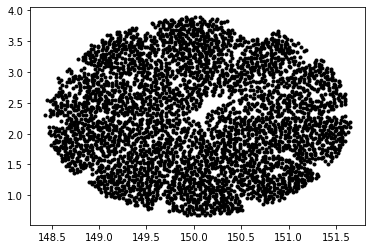

In [198]:
from matplotlib import pyplot as plt
plt.plot(fa['TARGET_RA'],fa['TARGET_DEC'],'k.')

In [196]:
fa.dtype.names

('TARGETID',
 'PETAL_LOC',
 'DEVICE_LOC',
 'LOCATION',
 'FIBER',
 'FIBERSTATUS',
 'TARGET_RA',
 'TARGET_DEC',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'LAMBDA_REF',
 'FA_TARGET',
 'FA_TYPE',
 'OBJTYPE',
 'FIBERASSIGN_X',
 'FIBERASSIGN_Y',
 'PRIORITY',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'RELEASE',
 'BRICKID',
 'BRICK_OBJID',
 'MORPHTYPE',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'MASKBITS',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PARALLAX',
 'BRICKNAME',
 'EBV',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'SERSIC',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'PHOTSYS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'SV3_DESI_TARGET',
 'SV3_BGS_TARGET',
 'SV3_MWS_TARGET',
 'SV3_SCND_TARGET',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET')

In [213]:
fba = fitsio.read('/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210405/fba-000001.fits')

In [214]:
len(fba)

5020

In [216]:
w = fba['DEVICE_TYPE'] == 'POS'
w &= fba['TARGETID'] > 0
print(len(fba[w]))

4444


In [217]:
ws = np.isin(fn['TARGETID'],fba[w]['TARGETID'])
print(np.sum(ws))

4444


In [220]:
fa = fitsio.read('/global/cfs/cdirs/desi/survey/fiberassign/SV3/20210405/fiberassign-000001.fits.gz')

In [221]:
ws = np.isin(fa['TARGETID'],fba[w]['TARGETID'])
print(np.sum(ws))

4444


In [222]:
fa = fitsio.read('/global/cfs/cdirs/desi/target/fiberassign/tiles/trunk/'+ts[:3]+'/fiberassign-'+ts+'.fits.gz')

In [223]:
ws = np.isin(fa['TARGETID'],fba[w]['TARGETID'])
print(np.sum(ws))

4444
